In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./merged_all_normalized.csv")

In [3]:
df

,chrom,start,end,Fresh,Fix,HexFix
0,chr10,3117593,3117993,3.043850,2.842246,2.647471
1,chr10,3172364,3172764,2.541208,3.128098,2.743539
2,chr10,3172903,3173303,3.430700,3.991285,3.250900
3,chr10,3181097,3181497,2.216993,3.040257,2.425915
4,chr10,3191617,3192017,2.434435,2.842246,1.776950
...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205


In [4]:
df['H'] = None
df['S'] = None
df['V'] = None

In [5]:
df

,chrom,start,end,Fresh,Fix,HexFix,H,S,V
0,chr10,3117593,3117993,3.043850,2.842246,2.647471,None,None,None
1,chr10,3172364,3172764,2.541208,3.128098,2.743539,None,None,None
2,chr10,3172903,3173303,3.430700,3.991285,3.250900,None,None,None
3,chr10,3181097,3181497,2.216993,3.040257,2.425915,None,None,None
4,chr10,3191617,3192017,2.434435,2.842246,1.776950,None,None,None
...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086,None,None,None
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393,None,None,None
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768,None,None,None
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205,None,None,None


In [6]:
Fresh_max = df['Fresh'].max()
Fix_max = df['Fix'].max()
HexFix_max = df['HexFix'].max()

In [7]:
df['Fresh'] = df['Fresh'] / Fresh_max
df['Fix'] = df['Fix'] / Fix_max
df['HexFix'] = df['HexFix'] / HexFix_max

In [8]:
df

,chrom,start,end,Fresh,Fix,HexFix,H,S,V
0,chr10,3117593,3117993,0.550832,0.387107,0.392360,None,None,None
1,chr10,3172364,3172764,0.459871,0.426039,0.406597,None,None,None
2,chr10,3172903,3173303,0.620838,0.543603,0.481789,None,None,None
3,chr10,3181097,3181497,0.401199,0.414075,0.359525,None,None,None
4,chr10,3191617,3192017,0.440549,0.387107,0.263347,None,None,None
...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,0.658955,0.658261,0.607640,None,None,None
68805,chrY,90808489,90808889,0.655877,0.513052,0.581750,None,None,None
68806,chrY,90810605,90811005,0.641148,0.569282,0.550980,None,None,None
68807,chrY,90825230,90825630,0.544253,0.314140,0.472942,None,None,None


In [9]:
import colorsys

def rgb_to_hsv(row):
    r, g, b = row['Fresh'], row['Fix'], row['HexFix']
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return pd.Series([h, s, v])

df[['H', 'S', 'V']] = df.apply(rgb_to_hsv, axis=1)

In [10]:
df

,chrom,start,end,Fresh,Fix,HexFix,H,S,V
0,chr10,3117593,3117993,0.550832,0.387107,0.392360,0.994652,0.297233,0.550832
1,chr10,3172364,3172764,0.459871,0.426039,0.406597,0.060823,0.115845,0.459871
2,chr10,3172903,3173303,0.620838,0.543603,0.481789,0.074091,0.223970,0.620838
3,chr10,3181097,3181497,0.401199,0.414075,0.359525,0.206006,0.131740,0.414075
4,chr10,3191617,3192017,0.440549,0.387107,0.263347,0.116402,0.402229,0.440549
...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,0.658955,0.658261,0.607640,0.164412,0.077874,0.658955
68805,chrY,90808489,90808889,0.655877,0.513052,0.581750,0.919834,0.217761,0.655877
68806,chrY,90810605,90811005,0.641148,0.569282,0.550980,0.033829,0.140636,0.641148
68807,chrY,90825230,90825630,0.544253,0.314140,0.472942,0.884983,0.422806,0.544253


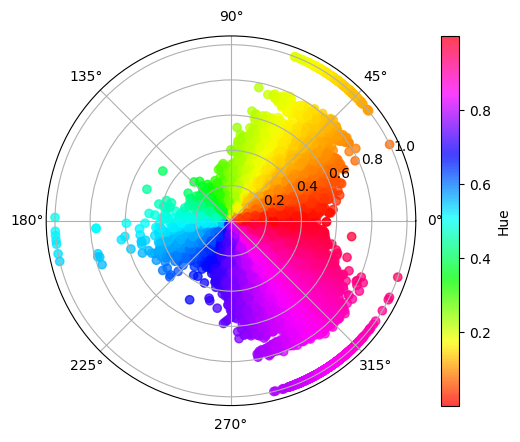

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

theta = df['H'] * 2 * np.pi
r = df['S']

c = ax.scatter(theta, r, c=df['H'], cmap='hsv', alpha=0.75)

plt.colorbar(c, label='Hue')

plt.show()

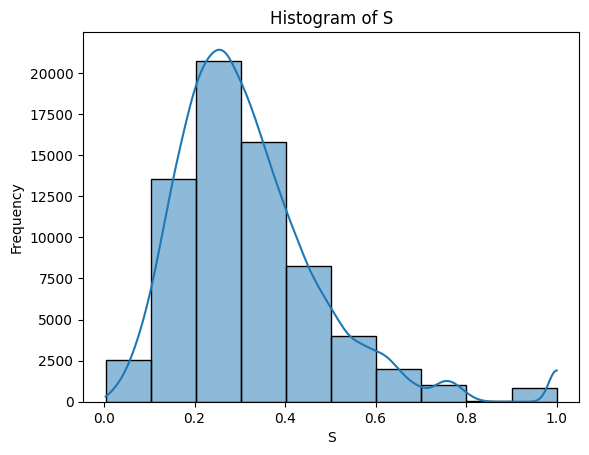

In [12]:
sns.histplot(df['S'], kde=True, bins=10)
plt.title('Histogram of S')
plt.xlabel('S')
plt.ylabel('Frequency')
plt.show()

D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


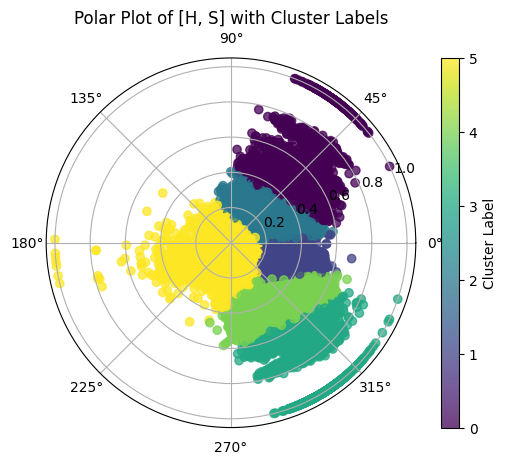

In [13]:
from sklearn.cluster import KMeans
x =  r * np.cos(theta)
y =  r * np.sin(theta)
polar_coords = np.vstack((x, y)).T

k=6
kmeans = KMeans(n_clusters=k, random_state=0)
df['hsv_label'] = kmeans.fit_predict(polar_coords)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=df['hsv_label'], alpha=0.75)
plt.colorbar(c, label='Cluster Label')
ax.set_title('Polar Plot of [H, S] with Cluster Labels')
plt.show()

In [14]:
df

,chrom,start,end,Fresh,Fix,HexFix,H,S,V,hsv_label
0,chr10,3117593,3117993,0.550832,0.387107,0.392360,0.994652,0.297233,0.550832,1
1,chr10,3172364,3172764,0.459871,0.426039,0.406597,0.060823,0.115845,0.459871,5
2,chr10,3172903,3173303,0.620838,0.543603,0.481789,0.074091,0.223970,0.620838,2
3,chr10,3181097,3181497,0.401199,0.414075,0.359525,0.206006,0.131740,0.414075,2
4,chr10,3191617,3192017,0.440549,0.387107,0.263347,0.116402,0.402229,0.440549,0
...,...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,0.658955,0.658261,0.607640,0.164412,0.077874,0.658955,5
68805,chrY,90808489,90808889,0.655877,0.513052,0.581750,0.919834,0.217761,0.655877,1
68806,chrY,90810605,90811005,0.641148,0.569282,0.550980,0.033829,0.140636,0.641148,5
68807,chrY,90825230,90825630,0.544253,0.314140,0.472942,0.884983,0.422806,0.544253,4


In [15]:
df['hsv_label'].value_counts()

hsv_label
1    18744
2    17179
5    12801
4    12256
0     4508
3     3321
Name: count, dtype: int64

In [16]:
df.groupby('hsv_label')[['Fresh', 'Fix', 'HexFix']].mean()

,Fresh,Fix,HexFix
hsv_label,,,
0,0.496530,0.421150,0.232232
1,0.637153,0.454633,0.519214
2,0.579010,0.486980,0.427054
3,0.497304,0.141714,0.456892
4,0.551271,0.321013,0.495641
5,0.580395,0.513293,0.552799


In [17]:
df.to_csv("hsv.csv", index=False)